In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# allmodels = np.load('/home/cheng/BayHunter-master/CH018/results/data/c_models.npy')
# read the model that has the best fit with mode of layers
x_age, y_rsl = np.loadtxt('tutorial/results/best_mode_model.txt').T
# allmodels = allmodels[~np.isnan(allmodels)]
x_age, y_rsl, x_age[1:]-x_age[:-1]

(array([-476.        , -329.20181274, -305.29281616,  -66.76715088,
          67.10112762,  215.56053162,  417.15740967,  459.96633911,
         564.21203613, 1076.8046875 , 1409.9005127 , 1861.71826172,
        1970.98461914, 2014.90161133]),
 array([-4.07706165, -3.96667933, -3.78955626, -3.62601376, -3.11245346,
        -3.29476452, -2.59376383, -2.77083015, -2.4345932 , -1.64127564,
        -1.30349064, -0.6080327 , -0.27132586,  0.04958701]),
 array([146.79818726,  23.90899658, 238.52566528, 133.8682785 ,
        148.45940399, 201.59687805,  42.80892944, 104.24569702,
        512.59265137, 333.0958252 , 451.81774902, 109.26635742,
         43.91699219]))

In [11]:
station = 'NJ_CC.csv'
sea_level = pd.read_csv(station)
x_obs_raw = 1950-np.array(sea_level['Age'])
y_obs_raw = np.array(sea_level['RSL'])
sort_idx = np.argsort(x_obs_raw)
x_obs = x_obs_raw[sort_idx]
y_obs = y_obs_raw[sort_idx]

y_pred = np.interp(x_obs, x_age, y_rsl)

In [12]:
x_obs, y_pred

(array([-476, -455, -401, -339, -329, -319, -314, -307, -301, -292, -264,
        -240, -200, -124,  -87,  -53,  -40,  -19,   27,  148,  311,  335,
         387,  404,  409,  424,  457,  470,  477,  481,  490,  498,  505,
         514,  522,  533,  538,  551,  564,  573,  585,  604,  626,  666,
         685,  699,  708,  720,  732,  747,  767,  787,  804,  819,  835,
         849,  871,  907,  939,  967,  969,  994, 1009, 1010, 1024, 1029,
        1036, 1065, 1108, 1119, 1135, 1154, 1173, 1181, 1209, 1226, 1238,
        1248, 1255, 1286, 1294, 1318, 1323, 1420, 1463, 1509, 1521, 1532,
        1594, 1604, 1612, 1645, 1661, 1687, 1700, 1727, 1756, 1785, 1790,
        1803, 1829, 1861, 1864, 1867, 1873, 1877, 1882, 1887, 1894, 1904,
        1907, 1911, 1912, 1915, 1925, 1934, 1941, 1947, 1954, 1959, 1962,
        1965, 1967, 1969, 1971, 1975, 1978, 1983, 1986, 1987, 1988, 1989,
        1991, 1993, 1995, 2017]),
 array([-4.07706165, -4.06127107, -4.02066672, -3.97404691, -3.96518426,
     

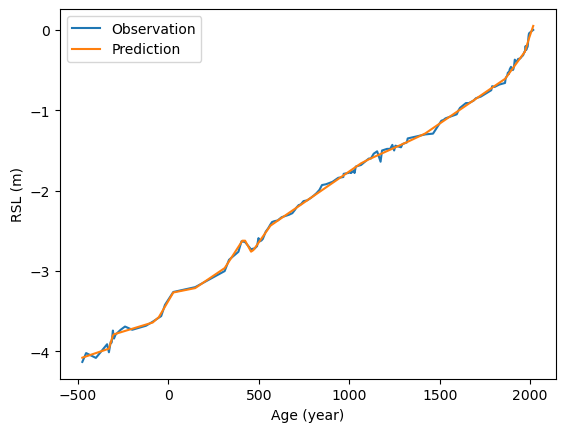

In [13]:
plt.plot(x_obs, y_obs, label = 'Observation')
plt.plot(x_obs, y_pred, label='Prediction')
plt.xlabel('Age (year)')
plt.ylabel('RSL (m)')
plt.legend()

Text(0, 0.5, 'RSL change rate (mm/year)')

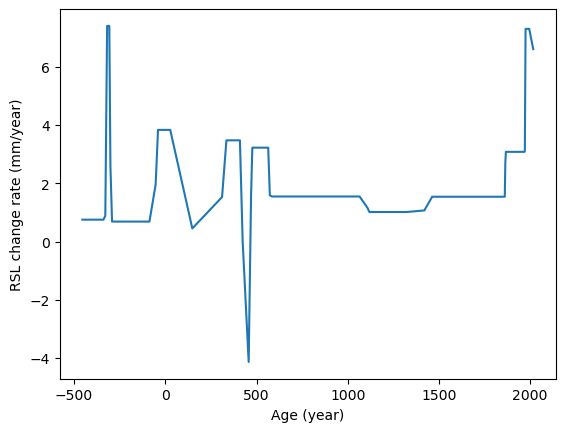

In [14]:
plt.plot(x_obs[1:], (y_pred[1:]-y_pred[:-1])/(x_obs[1:]-x_obs[:-1])*1000)
plt.xlabel('Age (year)')
plt.ylabel('RSL change rate (mm/year)')

The average rsl residual is 0.0012018702291509095


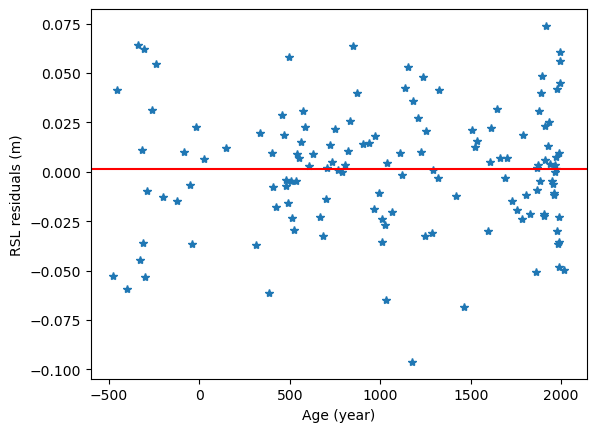

In [15]:
plt.plot(x_obs, y_obs-y_pred, '*')
plt.xlabel('Age (year)')
plt.ylabel('RSL residuals (m)')
print('The average rsl residual is', np.mean(y_obs-y_pred))
plt.axhline(np.mean(y_obs-y_pred), c='r')

Text(0.5, 0, 'Residuals')

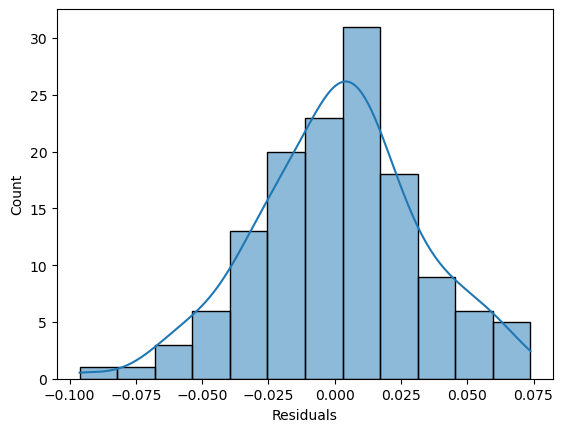

In [16]:
import seaborn as sns
sns.histplot(y_obs-y_pred, kde=True)
plt.xlabel('Residuals')

In [72]:
len(x_obs)

136